# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import files
from tqdm import tqdm

from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import joblib

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [2]:
#Mounting drive work folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Appliedai colab/Assignment 9 - Decision tree on donor's choose


In [5]:
%cd /content/drive/My Drive/Appliedai colab/donors choose data/

/content/drive/My Drive/Appliedai colab/donors choose data


In [0]:
data = pd.read_csv('preprocessed_final.csv', nrows = 50000, index_col = "Unnamed: 0") #reading locally using pandas
data = data.drop("teacher_id", axis = 1)
data.head(5)

# Feature Set 1 - TFIDF

In [14]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
#https://stackoverflow.com/a/54704747/9292995
%%time
numeric_features = ['teacher_number_of_previously_posted_projects', 'price', 'std_price']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','project_subject_categories','project_subject_subcategories']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# text_features = ['essay','project_title']
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words = 'english', min_df = 10))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('essay', text_transformer, "essay"),
        ('title', text_transformer, "project_title"),
        ('resource', text_transformer, "project_resource_summary")]
        ,n_jobs=-1, verbose=True, remainder = 'passthrough'
            )

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  tree.DecisionTreeClassifier(random_state=42))])

y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.767
CPU times: user 1min 46s, sys: 488 ms, total: 1min 47s
Wall time: 2min 1s


In [15]:
print("model score: %.3f" % clf.score(X_train, y_train))

model score: 1.000


In [22]:
%%time
param_grid = {
    # 'preprocessor__essay__tfidf__ngram_range': [(1,4)],
    'classifier__max_depth': [1, 5, 10, 50],
    'classifier__min_samples_split' : [5,10,100,500]
}

grid_search = GridSearchCV(clf, param_grid, cv = 3, verbose = 5, n_jobs = -1, return_train_score = True, scoring = "roc_auc", refit = True)
grid_search.fit(X_train, y_train)

print(("best decision tree from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 14.3min finished


best decision tree from grid search: 0.668
CPU times: user 22.6 s, sys: 2.26 s, total: 24.8 s
Wall time: 14min 41s


## **These are the best parameters**

In [17]:
grid_search.best_params_

NameError: ignored

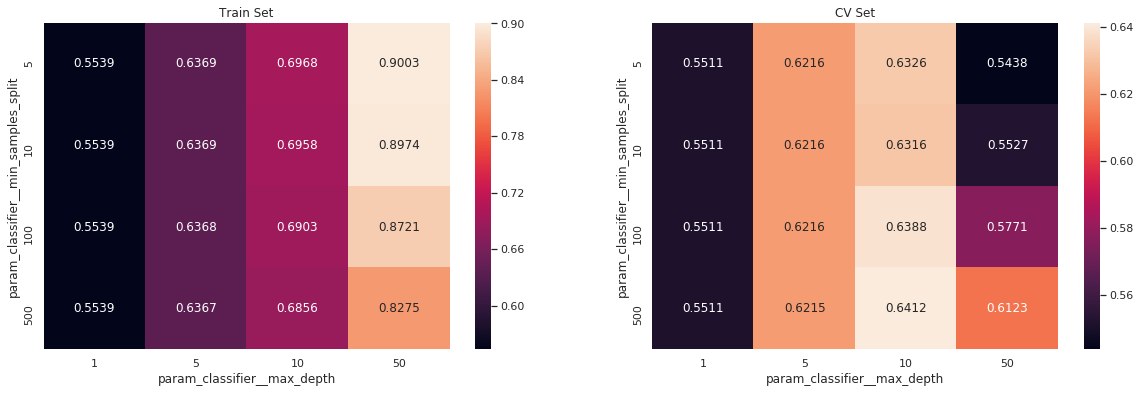

In [0]:
sns.set()
max_scores1 = pd.DataFrame(grid_search.cv_results_).groupby(['param_classifier__min_samples_split', 'param_classifier__max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

# Training model using best hyperparameter value

In [0]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
#https://stackoverflow.com/a/54704747/9292995
%%time
numeric_features = ['teacher_number_of_previously_posted_projects', 'price']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','clean_categories','clean_subcategories']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# text_features = ['essay','project_title']
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words = 'english', min_df = 10))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('essay', text_transformer, "essay"),
        ('title', text_transformer, "project_title")]
    ,n_jobs=-1, verbose=True, remainder = 'passthrough'
            )

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  tree.DecisionTreeClassifier(max_depth = 10,min_samples_split =500))])

y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.844
CPU times: user 16 s, sys: 579 ms, total: 16.6 s
Wall time: 33.8 s


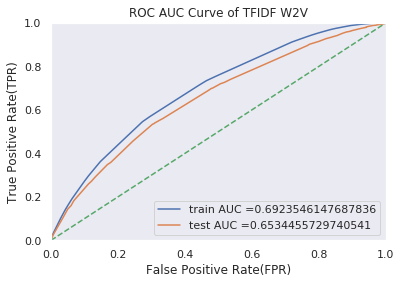

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

y_train_pred = clf.predict_proba(X_train)[:,1]
y_test_pred = clf.predict_proba(X_test)[:,1]
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC AUC Curve of TFIDF W2V")
plt.grid()
plt.show()

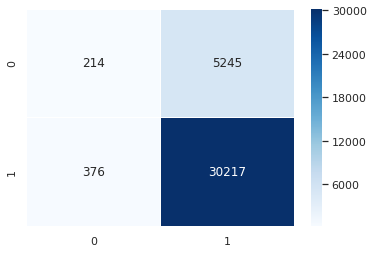

In [0]:
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,  annot=True,  cmap = 'Blues', fmt = 'g', linewidths=.5);

## Word cloud of False positive words

In [0]:
y_pred = clf.predict(X_test)
X_test_price = X_test['price'].values
X_test_words = X_test["essay"].values
X_test_prev = X_test["teacher_number_of_previously_posted_projects"].values

In [0]:
# https://stackoverflow.com/a/36184549/9292995
fp_points=[]
words = []
wordcorpus = ' '.join(words)
price_list = []
prev_projects = []
for i in range(len(y_test)):
    if (int((y_test[i]) == 0) and (int(y_pred[i]) == 1)):
        fp_points.append(i)
        words.append(X_test_words[i])
        price_list.append(X_test_price[i])
        prev_projects.append(X_test_prev[i])

In [0]:
print("Number of words matches the false positive data points:",len(words))

Number of words matches the false positive data points: 5245


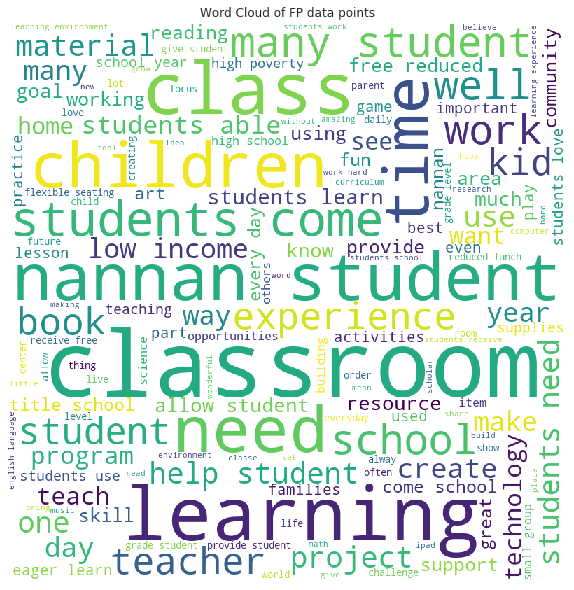

In [0]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(wordcorpus) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Word Cloud of FP data points")
plt.tight_layout(pad = 0)
plt.show() 

### Box plot with the `price` of the `false positive data points`

In [0]:
y_status=[]
for i in range(0,len(y_test)):
    for j in fp_points:
        if(i==j):
            y_status.append(y_test[i])

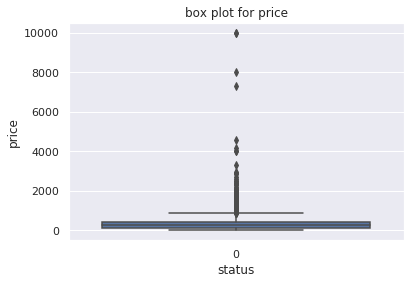

In [0]:
price_df = pd.DataFrame( {'price': price_fpr,'status': y_status})
plt.title("box plot for price")
sns.boxplot(x='status',y='price', data=price_df);

### PDF with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

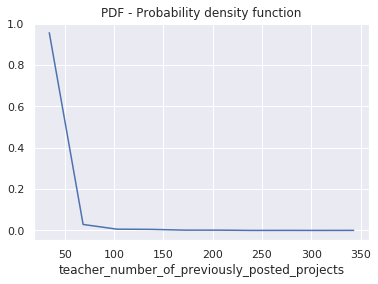

In [0]:
counts, bin_edges = np.histogram(prev_projects, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
axes = plt.gca()
cdf = np.cumsum(pdf)
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.title("PDF - Probability density function")
plt.plot(bin_edges[1:],pdf);

### Task 2: 

For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using 'feature_importances_` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3
Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.

In [0]:
#Array with index of features with non-zero feature importance
nonzero = np.nonzero(clf.named_steps['classifier'].feature_importances_)[0]

In [0]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

In [28]:
%%time
numeric_features = ['teacher_number_of_previously_posted_projects', 'price', 'std_price']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','project_subject_categories','project_subject_subcategories']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# text_features = ['essay','project_title']
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words = 'english', min_df = 10))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('essay', text_transformer, "essay"),
        ('title', text_transformer, "project_title"),
        ('resource', text_transformer, "project_resource_summary")]
        ,n_jobs=-1, verbose=True, remainder = 'passthrough'
            )

CPU times: user 485 µs, sys: 0 ns, total: 485 µs
Wall time: 499 µs


In [29]:
%time X_encoded = preprocessor.fit_transform(X)

CPU times: user 1.4 s, sys: 304 ms, total: 1.7 s
Wall time: 13.4 s


In [0]:
X_encoded_feat = X_encoded[:,nonzero]

In [31]:
%%time
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('classifier',  tree.DecisionTreeClassifier(random_state=42))])
X_train, X_test, y_train, y_test = train_test_split(X_encoded_feat, y, test_size=0.25, stratify=y)
clf.fit(X_train, y_train)

CPU times: user 22 s, sys: 12.7 ms, total: 22 s
Wall time: 22 s


In [41]:
%%time
cv = KFold(3)
param_grid = {
    'classifier__min_samples_split': [5, 10, 100, 500],
    'classifier__min_samples_leaf': [2, 5, 50, 100]
}
gs = GridSearchCV(clf, param_grid, cv = cv, n_jobs = -1, \
                  verbose=3, return_train_score = True, scoring = "roc_auc", refit = True)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.3min finished


CPU times: user 1.6 s, sys: 85.4 ms, total: 1.68 s
Wall time: 2min 19s


In [42]:
gs.param_grid

{'classifier__min_samples_leaf': [2, 5, 50, 100],
 'classifier__min_samples_split': [5, 10, 100, 500]}

In [43]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
# Utility function to report best scores
from time import time
start = time()
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean test score: {0:.8f} (std: {1:.8f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(gs.cv_results_)

Model with rank: 1
Mean test score: 0.60721681 (std: 0.00888213)
Parameters: {'classifier__min_samples_leaf': 100, 'classifier__min_samples_split': 500}

Model with rank: 2
Mean test score: 0.60131764 (std: 0.00821186)
Parameters: {'classifier__min_samples_leaf': 50, 'classifier__min_samples_split': 500}

Model with rank: 3
Mean test score: 0.59604086 (std: 0.00652641)
Parameters: {'classifier__min_samples_leaf': 100, 'classifier__min_samples_split': 5}

Model with rank: 3
Mean test score: 0.59604086 (std: 0.00652641)
Parameters: {'classifier__min_samples_leaf': 100, 'classifier__min_samples_split': 10}

Model with rank: 3
Mean test score: 0.59604086 (std: 0.00652641)
Parameters: {'classifier__min_samples_leaf': 100, 'classifier__min_samples_split': 100}



In [44]:
results = pd.DataFrame(gs.cv_results_)
results

NameError: ignored

In [0]:
#Heatmaps
sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_classifier__min_samples_leaf', 'param_classifier__min_samples_split']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0], cmap = 'Blues')
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1], cmap = 'Blues')
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

# Feature Set 2 - TFIDF W2V

In [0]:
open("glove_vectors","rb")

<_io.BufferedReader name='glove_vectors'>

## TFIDF W2V - preprocessed_essays

In [0]:
preprocessed_essays = data['essay'].values

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays.append(vector)

print(len(tfidf_w2v_essays))
print(len(tfidf_w2v_essays[0]))

100%|██████████| 50000/50000 [01:47<00:00, 463.45it/s]

50000
300


# TFIDF W2V - preprocessed_titles

In [0]:
preprocessed_titles = data['project_title'].values

In [0]:
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec for titles
# compute average word2vec for each title.
tfidf_w2v_titles = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))

100%|██████████| 50000/50000 [00:00<00:00, 78730.14it/s]

50000
300


## Concatenating all features

In [0]:
tfidf_w2v_essays_dataframe = pd.DataFrame(tfidf_w2v_essays)
tfidf_w2v_titles_dataframe = pd.DataFrame(tfidf_w2v_titles)

In [0]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
#https://stackoverflow.com/a/54704747/9292995
%%time
numeric_features = ['teacher_number_of_previously_posted_projects', 'price']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['school_state', 'teacher_prefix', 'project_grade_category','clean_categories','clean_subcategories']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'   
                             #,categories='auto' 
                             ))])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
    ,n_jobs=-1, verbose=True, remainder = 'drop'
            )

X_tfidf_w2v_preprocessed = preprocessor.fit_transform(data)
X_tfidf_w2v_encoded = hstack((X_tfidf_w2v_preprocessed ,tfidf_w2v_essays_dataframe ,tfidf_w2v_titles_dataframe)).tocsr()
print(X_tfidf_w2v_encoded.shape)#ow we have a full prediction pipeline.



y = data['project_is_approved'].values
X = X_tfidf_w2v_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

(50000, 1064)
CPU times: user 2.06 s, sys: 575 ms, total: 2.63 s
Wall time: 4.54 s


In [0]:
clf = Pipeline(steps=[('classifier',  tree.DecisionTreeClassifier(random_state=42))])
X_train, X_test, y_train, y_test = train_test_split(X_encoded_feat, y, test_size=0.25, stratify=y)
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=42,
                                        splitter='best'))],
         verbose=False)

In [0]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657


clf = DecisionTreeClassifier(class_weight='balanced')
grid_params = {'max_depth':[5], 'min_samples_split': [500]}
gs = GridSearchCV(clf, grid_params, cv=3, scoring='roc_auc',verbose=7,n_jobs = -1,return_train_score = True)
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   42.9s finished


0.6298735633421058
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'max_depth': 5, 'min_samples_split': 500}


In [0]:
%%time
param_grid = {
    'max_depth': [1, 5, 10, 50],
    'min_samples_split' : [5,10,100,500]
}
clf = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(clf, param_grid, cv=3, iid=False,verbose=10,n_jobs = -1,return_train_score = True, scoring = "roc_auc")
grid_search.fit(X_train, y_train)

print(("best decision tree from grid search: %.3f"
       % grid_search.score(X_test, y_test)))
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 25.8min finished


best decision tree from grid search: 0.629
0.6298736003884194
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'max_depth': 5, 'min_samples_split': 500}
CPU times: user 26.8 s, sys: 335 ms, total: 27.1 s
Wall time: 26min 16s


In [0]:
sns.set()
max_scores1 = pd.DataFrame(grid_search.cv_results_).groupby(['param_classifier__min_samples_split', 'param_classifier__max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

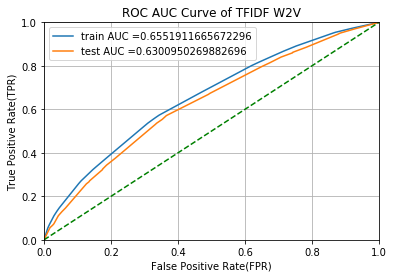

NameError: ignored

In [0]:
%%time
clf = DecisionTreeClassifier(class_weight='balanced',max_depth=5, min_samples_split= 500)
clf.fit(X_train, y_train)

y_train_pred = clf.predict_proba(X_train)[:,1]
y_test_pred = clf.predict_proba(X_test)[:,1]
    
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.close
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC AUC Curve of TFIDF W2V")
plt.grid()
plt.show()

Training Confusion Matrix for TFIDF W2V


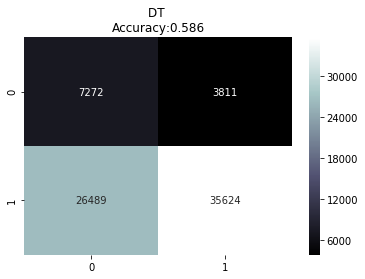

In [0]:
pred_tfidf_w2v_test = clf.predict(X_test)
pred_tfidf_w2v_train = clf.predict(X_train)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Training Confusion Matrix for TFIDF W2V")
cm = confusion_matrix(y_train, pred_tfidf_w2v_train)
sns.heatmap(cm, annot=True,fmt="d" ,cmap="bone")
plt.title('DT \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_tfidf_w2v_train)))
plt.show()

Testing  Confusion Matrix for TFIDF W2V


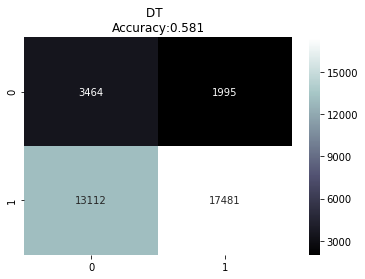

In [0]:
print("Testing  Confusion Matrix for TFIDF W2V")
cm =confusion_matrix(y_test, pred_tfidf_w2v_test)
sns.heatmap(cm, annot=True,fmt="d",cmap="bone")
plt.title('DT  \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf_w2v_test)))
plt.show()

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h2>1.6 Getting top 5k features using `feature_importances_`</h2>

<br> Check the step 4 of instructions

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>2. Summary</h1>

<br> as mentioned in the step 5 of instructions